# Project 3

Done by: Goh Chun Shan, DSIF 7

## Overview of project notebooks:

1 - Project Overview and Data Acquisition through Webscraping

**2 - Exploratory Data Analysis** (current notebook)

3 - Model Tuning and Insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import re

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix 
from sklearn.feature_extraction.text import CountVectorizer 

In [111]:
# Read in data
df_sa_posts = pd.read_csv('data\sa_unique_data.csv')
df_ocd_posts = pd.read_csv('data\ocd_unique_data.csv')

In [112]:
df_sa_posts.head()

,subreddit,selftext,title,id
0,socialanxiety,Pretty much the title. When I'm not doing amaz...,Does anyone else fixate on times of day for in...,yy5k9q
1,socialanxiety,I often feel like people in public from my com...,Is this schizophrenic?,yy5j8s
2,socialanxiety,"Yeah, how was your day?","Hello, how was your day?",yy5cgr
3,socialanxiety,I just wasn’t happy when I was with her lately...,Broke up with my first gf an hour ago and I’m ...,yy58ea
4,socialanxiety,This classmate had me disoriented all day beca...,Classmate gifted me a bag of cookies today.,yy53jh


In [113]:
df_sa_posts['fulltext'] = df_sa_posts['title'] + ' ' + df_sa_posts['selftext']
df_sa_posts['fulltextlength'] = df_sa_posts['fulltext'].apply(lambda x: len(str(x)))
df_sa_posts['selftextlength'] = df_sa_posts['selftext'].apply(lambda x: len(str(x)))
df_sa_posts['titlelength'] = df_sa_posts['title'].apply(lambda x: len(str(x)))

In [117]:
print(df_sa_posts.shape)
df_sa_posts.head()

(10631, 8)


,subreddit,selftext,title,id,fulltext,fulltextlength,selftextlength,titlelength
0,socialanxiety,Pretty much the title. When I'm not doing amaz...,Does anyone else fixate on times of day for in...,yy5k9q,Does anyone else fixate on times of day for in...,597,480,116
1,socialanxiety,I often feel like people in public from my com...,Is this schizophrenic?,yy5j8s,Is this schizophrenic? I often feel like peopl...,421,398,22
2,socialanxiety,"Yeah, how was your day?","Hello, how was your day?",yy5cgr,"Hello, how was your day? Yeah, how was your day?",48,23,24
3,socialanxiety,I just wasn’t happy when I was with her lately...,Broke up with my first gf an hour ago and I’m ...,yy58ea,Broke up with my first gf an hour ago and I’m ...,308,254,53
4,socialanxiety,This classmate had me disoriented all day beca...,Classmate gifted me a bag of cookies today.,yy53jh,Classmate gifted me a bag of cookies today. Th...,1117,1073,43


In [115]:
print(df_ocd_posts.shape)
df_ocd_posts.head()

(9623, 4)


,subreddit,selftext,title,id
0,OCD,"I'll go first, I'm 28F. I have a lot of childh...",What are your most disturbing/ disgusting intr...,yy5m0e
1,OCD,How do you all cope with OCD and live on?,"life, coping with OCD",yy5ja0
2,OCD,"I’ll try to make this as concise as possible, ...","Existential OCD, and fear of Psychosis OCD?",yy4vb3
3,OCD,I suffer from many different kinds of OCD and ...,OCD is ruining my life and can potentially rui...,yy4v6r
4,OCD,Last night I went to see Black Panther 2 with ...,"Do the exposure, babe!",yy4qs8


In [116]:
df_ocd_posts['fulltext'] = df_ocd_posts['title'] + ' ' + df_ocd_posts['selftext']
df_ocd_posts['fulltextlength'] = df_ocd_posts['fulltext'].apply(lambda x: len(str(x)))
df_ocd_posts['selftextlength'] = df_ocd_posts['selftext'].apply(lambda x: len(str(x)))
df_ocd_posts['titlelength'] = df_sa_posts['title'].apply(lambda x: len(str(x)))

In [118]:
#Take the first 9000 rows of data from each dataset
df_ocd_filtered = df_ocd_posts.head(9000)
df_sa_filtered = df_sa_posts.head(9000)

In [121]:
df_combined = df_ocd_filtered.append(df_sa_filtered)
print(df_combined.shape)
df_combined.head()

(18000, 8)


,subreddit,selftext,title,id,fulltext,fulltextlength,selftextlength,titlelength
0,OCD,"I'll go first, I'm 28F. I have a lot of childh...",What are your most disturbing/ disgusting intr...,yy5m0e,What are your most disturbing/ disgusting intr...,1299,1237,116
1,OCD,How do you all cope with OCD and live on?,"life, coping with OCD",yy5ja0,"life, coping with OCD How do you all cope with...",63,41,22
2,OCD,"I’ll try to make this as concise as possible, ...","Existential OCD, and fear of Psychosis OCD?",yy4vb3,"Existential OCD, and fear of Psychosis OCD? I’...",1599,1555,24
3,OCD,I suffer from many different kinds of OCD and ...,OCD is ruining my life and can potentially rui...,yy4v6r,OCD is ruining my life and can potentially rui...,195,138,53
4,OCD,Last night I went to see Black Panther 2 with ...,"Do the exposure, babe!",yy4qs8,"Do the exposure, babe! Last night I went to se...",503,480,43


In [123]:
df_combined.tail()

,subreddit,selftext,title,id,fulltext,fulltextlength,selftextlength,titlelength
8995,socialanxiety,after failing a job interview last week i dont...,no will to live anymore,wkaeun,no will to live anymore after failing a job in...,823,799,23
8996,socialanxiety,"Hey,\r\n\r\nIf anyone reads this, thank you be...",I don’t feel well,wk9no3,"I don’t feel well Hey,\r\n\r\nIf anyone reads ...",3675,3657,17
8997,socialanxiety,I genuinely have no clue how to handle this an...,What do you do when workers come to your house...,wk9dop,What do you do when workers come to your house...,430,360,69
8998,socialanxiety,[removed],I dont feel well,wk9c21,I dont feel well [removed],26,9,16
8999,socialanxiety,"Ugh you guys…\r\n\r\nFirst and foremost, I’m s...",Unemployed for many years and now have to put ...,wk945v,Unemployed for many years and now have to put ...,663,571,91


In [126]:
#Change subreddit = social anxiety to 1, and subreddit = ocd to 0

df_combined['subreddit']= np.where(df_combined['subreddit'] == 'socialanxiety', 1, 0)

#df_combined['subreddit'] = df_combined['subreddit'].map({'socialanxiety': 1, 'ocd': 0})

In [129]:
#output to file 

df_combined.to_csv('data\combined.csv', index = False)

## Exploratory Data Analysis

## Plot length of Titles and Posts

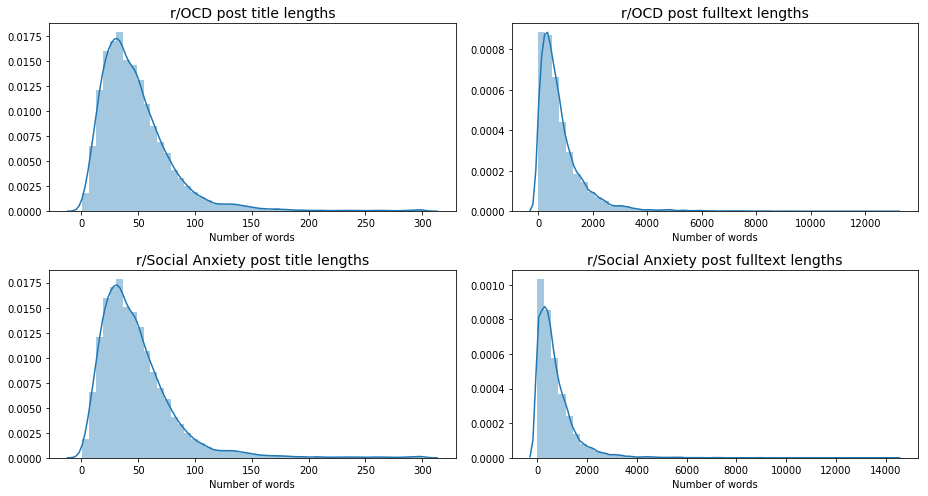

In [133]:
# plot distributions title lengths and full text lengths
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 7))

sns.distplot(df_ocd_filtered['titlelength distribution'], ax = ax[0][0])
ax[0][0].set_xlabel('Number of words')
#ax[0][0].set_xlim(0,300)
ax[0][0].set_title('r/OCD post title lengths', fontsize=14)
sns.distplot(df_ocd_filtered['selftextlength'], ax = ax[0][1])
ax[0][1].set_xlabel('Number of words')
ax[0][1].set_title('r/OCD post fulltext lengths distribution', fontsize=14)



sns.distplot(df_sa_filtered['titlelength'], ax = ax[1][0])
ax[1][0].set_xlabel('Number of words')
ax[1][0].set_title('r/Social Anxiety post title lengths distribution', fontsize=14)
sns.distplot(df_sa_filtered['selftextlength'], ax = ax[1][1])
ax[1][1].set_xlabel('Number of words')
ax[1][1].set_title('r/Social Anxiety post fulltext lengths distribution', fontsize=14)


plt.tight_layout()

Observation: Both OCD and Social Anxiety subreddits have similar post lengths for both title and body text.

# Conclusion

From preliminary Exploratory Data Analysis,

- There is no significant difference between the distributions of post title lengths and text lengths, hence we will not include 'number of words (length of post)' as a variable in the final model
- More analysis on common words and combination of words (using n-grams) can be found after CountVectorize in Part 3